In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# Get data

In [2]:
sfp_coord_data = pd.read_csv('figures/sfp_specific_simulation_coord.csv')
pool_sfp = sfp_coord_data.iloc[:100,].copy()
mutation_sfp = sfp_coord_data.iloc[100:200,].copy()
predict_sfp = sfp_coord_data.iloc[200:300,].copy()
data_sfp = sfp_coord_data.iloc[300:,].copy()

acps_coord_data = pd.read_csv('figures/acps_specific_simulation_coord.csv')
pool_acps = acps_coord_data.iloc[:100,].copy()
mutation_acps = acps_coord_data.iloc[100:200,].copy()
predict_acps = acps_coord_data.iloc[200:300,].copy()
data_acps = acps_coord_data.iloc[300:,].copy()

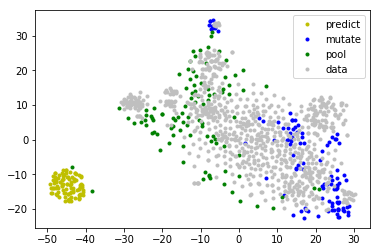

In [3]:
plt.plot(predict_sfp['x'],predict_sfp['y'],'y.')
plt.plot(mutation_sfp['x'],mutation_sfp['y'],'b.')
plt.plot(pool_sfp['x'],pool_sfp['y'],'g.')
plt.plot(data_sfp['x'],data_sfp['y'],'.',color='0.75')
plt.legend(['predict','mutate','pool','data'])

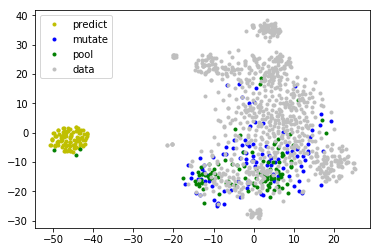

In [4]:
plt.plot(predict_acps['x'],predict_acps['y'],'y.')
plt.plot(mutation_acps['x'],mutation_acps['y'],'b.')
plt.plot(pool_acps['x'],pool_acps['y'],'g.')
plt.plot(data_acps['x'],data_acps['y'],'.',color='0.75')
plt.legend(['predict','mutate','pool','data'])

# Analyze distance

In [5]:
def closest_data(x,y,data):
    # pass either data_sfp or data_acps for data
    # looks for the closest point in data using the euclidean distance
    dist_sqr = (data['x']-x)**2 + (data['y']-y)**2
    min_dist = np.sqrt(dist_sqr.min())
    idx = dist_sqr.idxmin()
    return min_dist

In [6]:
def add_distances(method_df,data_df):
    method_df['closest_data_dist'] = pd.Series()
    for i,row in method_df.iterrows():
        method_df['closest_data_dist'][i]=closest_data(row['x'],row['y'],data_df)

In [7]:
add_distances(pool_sfp,data_sfp)
add_distances(mutation_sfp,data_sfp)

In [8]:
pool_sfp['closest_data_dist'].describe()

count    100.000000
mean       2.232058
std        3.217953
min        0.172202
25%        0.976900
50%        1.633589
75%        2.481020
max       24.722791
Name: closest_data_dist, dtype: float64

In [9]:
mutation_sfp['closest_data_dist'].describe()

count    100.000000
mean       1.420326
std        0.773466
min        0.037080
25%        0.911090
50%        1.254851
75%        1.785296
max        3.607095
Name: closest_data_dist, dtype: float64

In [10]:
add_distances(pool_acps,data_acps)
add_distances(mutation_acps,data_acps)

In [11]:
pool_acps['closest_data_dist'].describe()

count    100.000000
mean       1.717498
std        4.073649
min        0.065313
25%        0.616109
50%        0.945503
75%        1.422696
max       28.280739
Name: closest_data_dist, dtype: float64

In [12]:
mutation_acps['closest_data_dist'].describe()

count    100.000000
mean       0.937268
std        0.607125
min        0.013635
25%        0.491682
50%        0.864718
75%        1.298654
max        2.872485
Name: closest_data_dist, dtype: float64

In [13]:
# Pull data for benchmark comparisons

In [14]:
# This data comes from jialei
# The data is a number between 0 and 1, where 1 indicates a 100% success rate
benchmark_sfp = pd.read_csv('figures/sfp_specific_simulation_quality.csv')
benchmark_acps = pd.read_csv('figures/acps_specific_simulation_quality.csv')

In [15]:
benchmark_acps.head()

,pool,mutate,predict_optimize
0,0.002392,0.000608,0.001771
1,0.017859,0.000711,0.003025
2,0.025922,0.000770,0.004156
3,0.028286,0.027254,0.004977
4,0.031336,0.028297,0.005599


# make fancy plots

In [16]:
# discarded colors
"""
# no
pool_col='#8dd3c7'
predict_col='#ffffb3'
mutation_col='#bebada'

predict_col='#e41a1c'
mutation_col='#377eb8'
pool_col='#4daf4a'

predict_col = '#edf8b1'
mutation_col = '#7fcdbb'
pool_col = '#2c7fb8'

pool_col = '#7fc97f'
predict_col = '#beaed4'
mutation_col = '#fdc086'

# pretty good
pool_col = '#1b9e77'
predict_col = '#d95f02'
mutation_col = '#7570b3'

predict_col='#a6cee3'
pool_col='#1f78b4'
mutation_col='#b2df8a'
"""

"\n# no\npool_col='#8dd3c7'\npredict_col='#ffffb3'\nmutation_col='#bebada'\n\npredict_col='#e41a1c'\nmutation_col='#377eb8'\npool_col='#4daf4a'\n\npredict_col = '#edf8b1'\nmutation_col = '#7fcdbb'\npool_col = '#2c7fb8'\n\npool_col = '#7fc97f'\npredict_col = '#beaed4'\nmutation_col = '#fdc086'\n\n# pretty good\npool_col = '#1b9e77'\npredict_col = '#d95f02'\nmutation_col = '#7570b3'\n\npredict_col='#a6cee3'\npool_col='#1f78b4'\nmutation_col='#b2df8a'\n"

In [17]:
# colors from http://colorbrewer2.org/#type=qualitative&scheme=Accent&n=3
pool_col = '#ca0020'
predict_col = '#f4a582'
mutation_col='#0571b0'

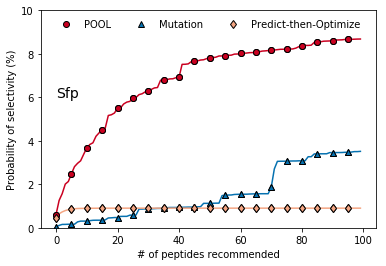

In [18]:
subset_to_plot = list(range(0,100,5))
plt.plot(benchmark_sfp['pool'][subset_to_plot]*100,'o',color=pool_col,markeredgecolor='k')
plt.plot(benchmark_sfp['mutate'][subset_to_plot]*100,'^',color=mutation_col,markeredgecolor='k')
plt.plot(benchmark_sfp['predict_optimize'][subset_to_plot]*100,'d',color=predict_col,markeredgecolor='k')

plt.plot(benchmark_sfp['pool']*100,'-',color=pool_col)
plt.plot(benchmark_sfp['mutate']*100,'-',color=mutation_col)
plt.plot(benchmark_sfp['predict_optimize']*100,'-',color=predict_col)

plt.plot(benchmark_sfp['pool'][subset_to_plot]*100,'o',color=pool_col,markeredgecolor='k')
plt.plot(benchmark_sfp['mutate'][subset_to_plot]*100,'^',color=mutation_col,markeredgecolor='k')
plt.plot(benchmark_sfp['predict_optimize'][subset_to_plot]*100,'d',color=predict_col,markeredgecolor='k')

plt.xlabel('# of peptides recommended')
plt.ylabel('Probability of selectivity (%)')
plt.text(0,6,'Sfp',fontsize=14)
plt.ylim(0,10)
plt.legend(['POOL','Mutation','Predict-then-Optimize'],frameon=False,loc='upper center',ncol=3)
plt.savefig('fig3a.eps')

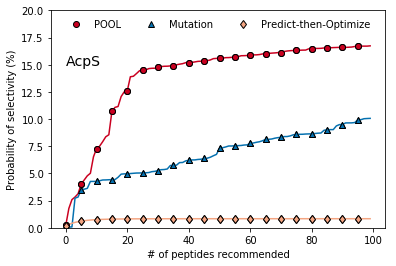

In [19]:
subset_to_plot = list(range(0,100,5))
plt.plot(benchmark_acps['pool'][subset_to_plot]*100,'o',color=pool_col,markeredgecolor='k')
plt.plot(benchmark_acps['mutate'][subset_to_plot]*100,'^',color=mutation_col,markeredgecolor='k')
plt.plot(benchmark_acps['predict_optimize'][subset_to_plot]*100,'d',color=predict_col,markeredgecolor='k')

plt.plot(benchmark_acps['pool']*100,'-',color=pool_col)
plt.plot(benchmark_acps['mutate']*100,'-',color=mutation_col)
plt.plot(benchmark_acps['predict_optimize']*100,'-',color=predict_col)

plt.plot(benchmark_acps['pool'][subset_to_plot]*100,'o',color=pool_col,markeredgecolor='k')
plt.plot(benchmark_acps['mutate'][subset_to_plot]*100,'^',color=mutation_col,markeredgecolor='k')
plt.plot(benchmark_acps['predict_optimize'][subset_to_plot]*100,'d',color=predict_col,markeredgecolor='k')

plt.xlabel('# of peptides recommended')
plt.ylabel('Probability of selectivity (%)')
plt.text(0,15,'AcpS',fontsize=14)
plt.ylim(0,20)
plt.legend(['POOL','Mutation','Predict-then-Optimize'],frameon=False,loc='upper center',ncol=3)
plt.savefig('fig3b.eps')

In [20]:
def closest_idx(x,y,data):
    # pass either data_sfp or data_acps for data
    # looks for the closest point in data using the euclidean distance
    dist_sqr = (data['x']-x)**2 + (data['y']-y)**2
    idx = dist_sqr.idxmin()
    return idx

def plot_lines(method_df,data_df,col):
    for i,row in method_df.iterrows():
        idx=closest_idx(row['x'],row['y'],data_df)
        x = data_df.loc[idx]['x']
        y = data_df.loc[idx]['y']
        plt.plot([row['x'],x],[row['y'],y],col,alpha=1,linewidth=1)

In [21]:
pool_mrk='o'
predict_mrk='d'
mutation_mrk='^'
data_mrk='s'
mrk_sz=4

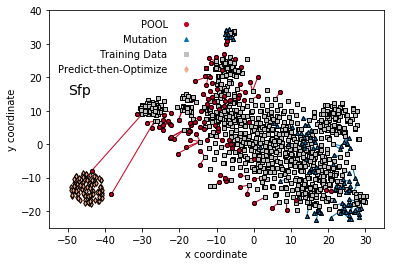

In [22]:
plt.plot(pool_sfp['x'],pool_sfp['y'],pool_mrk,color=pool_col,markersize=mrk_sz)
plt.plot(mutation_sfp['x'],mutation_sfp['y'],mutation_mrk,color=mutation_col,markersize=mrk_sz)
plt.plot(data_sfp['x'],data_sfp['y'],data_mrk,color='0.75',markersize=mrk_sz)
plt.plot(predict_sfp['x'],predict_sfp['y'],predict_mrk,color=predict_col,markersize=mrk_sz)

plot_lines(pool_sfp,data_sfp,pool_col)
plot_lines(mutation_sfp,data_sfp,mutation_col)

# Overplot with training data first so that everything goes on top of the lines,
# and pool and mutation last so they are the top-most layer
plt.plot(data_sfp['x'],data_sfp['y'],data_mrk,color='0.75',markersize=mrk_sz,markeredgecolor='k')
plt.plot(predict_sfp['x'],predict_sfp['y'],predict_mrk,color=predict_col,markersize=mrk_sz,markeredgecolor='k')
plt.plot(mutation_sfp['x'],mutation_sfp['y'],mutation_mrk,color=mutation_col,markersize=mrk_sz,markeredgecolor='k')
plt.plot(pool_sfp['x'],pool_sfp['y'],pool_mrk,color=pool_col,markersize=mrk_sz,markeredgecolor='k')

plt.legend(['POOL','Mutation','Training Data','Predict-then-Optimize'],frameon=False,markerfirst=False)

plt.xlim(-55,35)
plt.ylim(-25,40)
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.text(-50,15,'Sfp',fontsize=14)
plt.savefig('fig3c.eps',transparent=True)

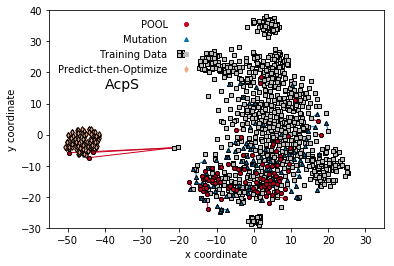

In [23]:
#plt.plot(pool_acps['x'],pool_acps['y'],'.',color=pool_col)
#plt.plot(mutation_acps['x'],mutation_acps['y'],'.',color=mutation_col)
#plt.plot(data_acps['x'],data_acps['y'],'.',color='0.75')
#plt.plot(predict_acps['x'],predict_acps['y'],'.',color=predict_col)
#plot_lines(pool_acps,data_acps,pool_col)
#plot_lines(mutation_acps,data_acps,mutation_col)

plt.plot(pool_acps['x'],pool_acps['y'],pool_mrk,color=pool_col,markersize=mrk_sz)
plt.plot(mutation_acps['x'],mutation_acps['y'],mutation_mrk,color=mutation_col,markersize=mrk_sz)
plt.plot(data_acps['x'],data_acps['y'],data_mrk,color='0.75',markersize=mrk_sz)
plt.plot(predict_acps['x'],predict_acps['y'],predict_mrk,color=predict_col,markersize=mrk_sz)

plot_lines(pool_acps,data_acps,pool_col)
plot_lines(mutation_acps,data_acps,mutation_col)

# Overplot with training data first so that everything goes on top of the lines,
# and pool and mutation last so they are the top-most layer
plt.plot(data_acps['x'],data_acps['y'],data_mrk,color='0.75',markersize=mrk_sz,markeredgecolor='k')
plt.plot(predict_acps['x'],predict_acps['y'],predict_mrk,color=predict_col,markersize=mrk_sz,markeredgecolor='k')
plt.plot(mutation_acps['x'],mutation_acps['y'],mutation_mrk,color=mutation_col,markersize=mrk_sz,markeredgecolor='k')
plt.plot(pool_acps['x'],pool_acps['y'],pool_mrk,color=pool_col,markersize=mrk_sz,markeredgecolor='k')

plt.legend(['POOL','Mutation','Training Data','Predict-then-Optimize'],frameon=False,markerfirst=False)
plt.xlim(-55,35)
plt.ylim(-30,40)
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.text(-40,15,'AcpS',fontsize=14)
plt.savefig('fig3d.eps',transparent=True)

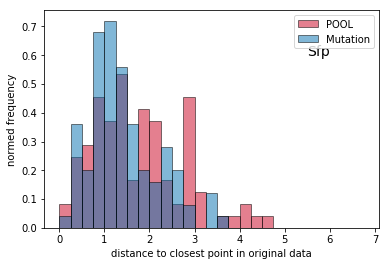

In [24]:
bins = np.arange(7,step=0.25)
plt.hist(pool_sfp['closest_data_dist'],bins,density=True,alpha=0.5,color=pool_col,histtype='bar', ec='black')
plt.hist(mutation_sfp['closest_data_dist'],bins,density=True,alpha=0.5,color=mutation_col,histtype='bar', ec='black')
plt.legend(['POOL','Mutation'])
plt.xlabel('distance to closest point in original data')
plt.ylabel('normed frequency')
plt.text(5.5,0.6, 'Sfp',fontsize=14)
plt.savefig('fig3e.pdf',transparent=True)

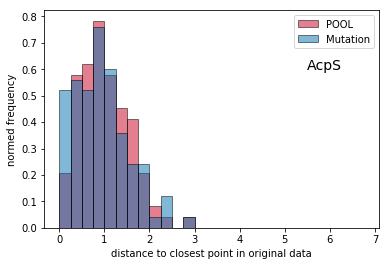

In [25]:
bins = np.arange(7,step=0.25)
plt.hist(pool_acps['closest_data_dist'],bins,density=True,alpha=0.5,color=pool_col,histtype='bar', ec='black')
plt.hist(mutation_acps['closest_data_dist'],bins,density=True,alpha=0.5,color=mutation_col,histtype='bar', ec='black')
plt.legend(['POOL','Mutation'])
plt.xlabel('distance to closest point in original data')
plt.ylabel('normed frequency')
plt.text(5.5,0.6, 'AcpS',fontsize=14)
plt.savefig('fig3f.pdf',transparent=True)